# OBSERVATÓRIO PUC-CAMPINAS

# BOLETIM COVID-19 RMC
***
### SCRIPT PARA CURVA EPIDEMIOLÓGICA PARA A REGIÃO METROPOLITANA DE CAMPINAS
#### PUBLICAÇÃO Nº 02
Período analisado: 19/FEV - 30/MAI
***

In [18]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import locale

locale.setlocale(locale.LC_TIME, 'pt_BR.UTF-8')
%matplotlib inline

In [19]:
df = pd.read_csv("https://raw.githubusercontent.com/seade-R/dados-covid-sp/master/data/dados_covid_sp.csv", sep=";", decimal=",")

In [20]:
df.head()

,nome_munic,codigo_ibge,dia,mes,datahora,casos,casos_novos,casos_pc,casos_mm7d,obitos,...,nome_drs,cod_drs,pop,pop_60,area,map_leg,map_leg_s,latitude,longitude,semana_epidem
0,Adamantina,3500105,25,2,2020-02-25,0,0,0.0,0.0,0,...,Marília,5,33894,7398,41199,0,8.0,-21.6820,-51.0737,9
1,Adolfo,3500204,25,2,2020-02-25,0,0,0.0,0.0,0,...,São José do Rio Preto,15,3447,761,21106,0,8.0,-21.2325,-49.6451,9
2,Aguaí,3500303,25,2,2020-02-25,0,0,0.0,0.0,0,...,São João da Boa Vista,14,35608,5245,47455,0,8.0,-22.0572,-46.9735,9
3,Águas da Prata,3500402,25,2,2020-02-25,0,0,0.0,0.0,0,...,São João da Boa Vista,14,7797,1729,14267,0,8.0,-21.9319,-46.7176,9
4,Águas de Lindóia,3500501,25,2,2020-02-25,0,0,0.0,0.0,0,...,Campinas,3,18374,3275,6013,0,8.0,-22.4733,-46.6314,9


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51744 entries, 0 to 51743
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   nome_munic     51744 non-null  object 
 1   codigo_ibge    51744 non-null  int64  
 2   dia            51744 non-null  int64  
 3   mes            51744 non-null  int64  
 4   datahora       51744 non-null  object 
 5   casos          51744 non-null  int64  
 6   casos_novos    51744 non-null  int64  
 7   casos_pc       51744 non-null  float64
 8   casos_mm7d     51744 non-null  float64
 9   obitos         51744 non-null  int64  
 10  obitos_novos   51744 non-null  int64  
 11  obitos_pc      51744 non-null  float64
 12  obitos_mm7d    51744 non-null  float64
 13  letalidade     51744 non-null  float64
 14  nome_ra        51648 non-null  object 
 15  cod_ra         51744 non-null  int64  
 16  nome_drs       51648 non-null  object 
 17  cod_drs        51744 non-null  int64  
 18  pop   

In [22]:
dfrmc = df[(df["codigo_ibge"] == 3501608) |
   (df["codigo_ibge"] == 3503802) |
   (df["codigo_ibge"] == 3509502) |
   (df["codigo_ibge"] == 3512803) |
   (df["codigo_ibge"] == 3515152) |
   (df["codigo_ibge"] == 3519055) |
   (df["codigo_ibge"] == 3519071) |
   (df["codigo_ibge"] == 3520509) |
   (df["codigo_ibge"] == 3523404) |
   (df["codigo_ibge"] == 3524709) |
   (df["codigo_ibge"] == 3531803) |
   (df["codigo_ibge"] == 3532009) |
   (df["codigo_ibge"] == 3533403) |
   (df["codigo_ibge"] == 3536505) |
   (df["codigo_ibge"] == 3537107) |
   (df["codigo_ibge"] == 3545803) |
   (df["codigo_ibge"] == 3548005) |
   (df["codigo_ibge"] == 3552403) |
   (df["codigo_ibge"] == 3556206) |
   (df["codigo_ibge"] == 3556701)]

dfrmc.head()

,nome_munic,codigo_ibge,dia,mes,datahora,casos,casos_novos,casos_pc,casos_mm7d,obitos,...,nome_drs,cod_drs,pop,pop_60,area,map_leg,map_leg_s,latitude,longitude,semana_epidem
17,Americana,3501608,25,2,2020-02-25,0,0,0.0,0.0,0,...,Campinas,3,233458,40276,13391,0,8.0,-22.7374,-47.3331,9
36,Artur Nogueira,3503802,25,2,2020-02-25,0,0,0.0,0.0,0,...,Campinas,3,52609,6762,17803,0,8.0,-22.5727,-47.1727,9
91,Campinas,3509502,25,2,2020-02-25,0,0,0.0,0.0,0,...,Campinas,3,1175501,192796,79457,0,8.0,-22.9053,-47.0659,9
121,Cosmópolis,3512803,25,2,2020-02-25,0,0,0.0,0.0,0,...,Campinas,3,71282,8796,15467,0,8.0,-22.6419,-47.1926,9
144,Engenheiro Coelho,3515152,25,2,2020-02-25,0,0,0.0,0.0,0,...,Piracicaba,11,20535,1870,10994,0,8.0,-22.4836,-47.2110,9


In [23]:
dfrmc = dfrmc[['datahora', 'casos_novos', 'obitos_novos']]
dfrmc.columns = ['date', 'newCases', 'newDeaths']

In [24]:
dfrmc['date'] = pd.to_datetime(dfrmc['date'], format="%Y/%m/%d")

In [25]:
dfrmc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1920 entries, 17 to 51640
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       1920 non-null   datetime64[ns]
 1   newCases   1920 non-null   int64         
 2   newDeaths  1920 non-null   int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 60.0 KB


In [26]:
dfrmc_grouped = dfrmc.groupby(by = "date", sort=True).sum()
dfrmc_grouped.head()

,newCases,newDeaths
date,,
2020-02-25,0,0
2020-02-26,0,0
2020-02-27,0,0
2020-02-28,0,0
2020-02-29,0,0


In [27]:
dfrmc_grouped = dfrmc_grouped.reset_index(drop=False)
dfrmc_grouped.tail()

,date,newCases,newDeaths
91,2020-05-26,67,7
92,2020-05-27,92,4
93,2020-05-28,171,4
94,2020-05-29,189,12
95,2020-05-30,185,6


In [28]:
dfrmc_gweek = dfrmc_grouped.groupby(pd.Grouper(key = 'date', freq = 'W-SAT')).sum().reset_index().sort_values('date')
dfrmc_gweek

,date,newCases,newDeaths
0,2020-02-29,0,0
1,2020-03-07,0,0
2,2020-03-14,0,0
3,2020-03-21,3,0
4,2020-03-28,5,0
5,2020-04-04,32,5
6,2020-04-11,93,3
7,2020-04-18,145,8
8,2020-04-25,123,9
9,2020-05-02,267,17


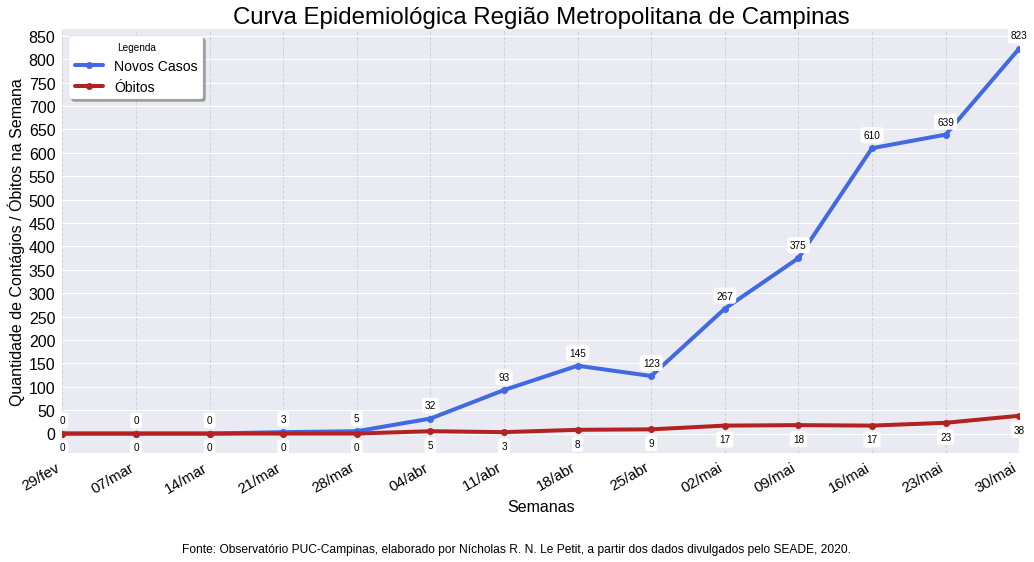

In [29]:
plt.style.use('seaborn')
#plt.style.use('fivethirtyeight')

############### Combinado

plttextcolor = '#000000'
mpl.rcParams.update({'text.color': plttextcolor})



#V1
axc = dfrmc_gweek.plot('date', ['newCases', 'newDeaths'], marker="o", figsize=[16,9], kind="line", linewidth=4, color=['royalblue','firebrick'], x_compat=True)

gweek_n = dfrmc_gweek.shape[0]
gweek_xmin = dfrmc_gweek['date'].iloc[0]
gweek_xmax = dfrmc_gweek['date'].iloc[-1]
axc.set_xlim(gweek_xmin, gweek_xmax)
axc.set_xticks(pd.date_range(gweek_xmin, periods=gweek_n, freq='W-SAT'))

axc.xaxis.set_major_formatter(mdates.DateFormatter("%d/%b"))
axc.set_yticks(np.arange(0,900,50), minor=False)
axc.tick_params(axis='both', which='minor', labelsize=14)
axc.tick_params(axis="x", which='both', colors = plttextcolor, labelsize=15)
axc.tick_params(axis="y", which='both', colors = plttextcolor, labelsize=16)
axc.grid(b=True, which='major', axis='x', color='lightgray', linestyle='--')
axc.grid(b=True, which='minor', axis='x', linestyle='--')
axc.grid(b=True, which='both', axis='y', linestyle='-')


axc.set_title("Curva Epidemiológica Região Metropolitana de Campinas", color=plttextcolor, fontsize=24)
axc.set_xlabel("Semanas", color=plttextcolor, fontsize=16)
axc.set_ylabel("Quantidade de Contágios / Óbitos na Semana", color=plttextcolor, fontsize=16)
#axc.legend(labels=['Novos Casos', 'Óbitos'], loc='upper left', fontsize=16, title="Legenda", facecolor='white', frameon=True, framealpha=0.8)
axc.legend(labels=['Novos Casos', 'Óbitos'], loc='upper left', fontsize=14, title="Legenda", facecolor='white', frameon=True, shadow=True, framealpha=1)#, bbox_to_anchor=(1.215,1.0175))
plt.tight_layout(pad=7)
    

for x,y in zip(dfrmc_gweek['date'],dfrmc_gweek['newCases']):

    label = y

    
    plt.annotate(label,
                 (x,y),
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center', 
                 bbox=dict(fc='white', ec='none', boxstyle='round',pad=0.3))
    
    
for x,y in zip(dfrmc_gweek['date'],dfrmc_gweek['newDeaths']):

    label = y

    
    plt.annotate(label,
                 (x,y),
                 textcoords="offset points", # how to position the text
                 xytext=(0,-17), # distance from text to points (x,y)
                 ha='center', 
                 bbox=dict(fc='white', ec='none', boxstyle='round',pad=0.3))

plt.annotate('Fonte: Observatório PUC-Campinas, elaborado por Nícholas R. N. Le Petit, a partir dos dados divulgados pelo SEADE, 2020.', (0,0), (120, -90), xycoords='axes fraction', textcoords='offset points', fontsize=12, 
             va='top')


plt.savefig("graph_comb_30MAI_finalv2.jpg", dpi=600, bbox_inches='tight')